In [284]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [285]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combination
# np.random.uniform()method helps to return random values as arrays
# uniform()method returns random floating number between two specified numbers
lats = np.random.uniform(lat_range[0],lat_range[1],size=1500)
lngs = np.random.uniform(lng_range[0],lng_range[1],size=1500)

# Zipping the list(pairs elements from first list with elements from second list)
lat_lngs = zip(lats,lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
       
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
city_count=len(cities)
city_count

586

# Perform API Calls

In [286]:
# Url
url = "http://api.openweathermap.org/data/2.5/weather?"
# temperature in Fahrenheit
units = "imperial"
# Building the base URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Print the log
print(f"Beginning Data Retrieval")
print("------------------------------")
counter = 0
#Intializing the list
name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloud=[]
speed=[]
country=[]
date=[]

# loop through the cities to retrieve the data
for city in cities:
    counter= counter+1
# Handle Try and Exception
# Try to access key that doesn't exist
    try:
#         if response["cod"]==200:
        response=requests.get(query_url+city).json()
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Proccessing Record {counter} of {city_count} | {city} ")
# "Catching" the error lets the rest of our code execute
    except (KeyError, IndexError):
        print("City not found. Skipping.")
# Print ending log statement
print(f'-----------------------------------')
print(f'Data Retrieval Completed')
print(f'-----------------------------------')

Beginning Data Retrieval
------------------------------
Proccessing Record 1 of 586 | tuktoyaktuk 
Proccessing Record 2 of 586 | hithadhoo 
Proccessing Record 3 of 586 | ribeira grande 
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
City not found. Skipping.
Proccessing Record 8 of 586 | mana 
Proccessing Record 9 of 586 | pisco 
City not found. Skipping.
Proccessing Record 11 of 586 | qaanaaq 
Proccessing Record 12 of 586 | rikitea 
Proccessing Record 13 of 586 | ushuaia 
Proccessing Record 14 of 586 | jamestown 
Proccessing Record 15 of 586 | sao filipe 
Proccessing Record 16 of 586 | butaritari 
Proccessing Record 17 of 586 | padilla 
City not found. Skipping.
Proccessing Record 19 of 586 | ayr 
Proccessing Record 20 of 586 | bestobe 
Proccessing Record 21 of 586 | barrow 
Proccessing Record 22 of 586 | cape town 
Proccessing Record 23 of 586 | vaini 
Proccessing Record 24 of 586 | albany 
Proccessing Record 25 of 586 | kushima 
Proccessing Record 26 o

Proccessing Record 204 of 586 | bousse 
Proccessing Record 205 of 586 | bilma 
Proccessing Record 206 of 586 | gat 
City not found. Skipping.
Proccessing Record 208 of 586 | aklavik 
City not found. Skipping.
Proccessing Record 210 of 586 | dicabisagan 
Proccessing Record 211 of 586 | port blair 
Proccessing Record 212 of 586 | ponta do sol 
Proccessing Record 213 of 586 | lasa 
Proccessing Record 214 of 586 | buala 
Proccessing Record 215 of 586 | ucluelet 
Proccessing Record 216 of 586 | pimenta bueno 
Proccessing Record 217 of 586 | baykit 
City not found. Skipping.
Proccessing Record 219 of 586 | saint-philippe 
Proccessing Record 220 of 586 | isangel 
Proccessing Record 221 of 586 | davidson 
Proccessing Record 222 of 586 | pacific grove 
Proccessing Record 223 of 586 | huanren 
Proccessing Record 224 of 586 | lahaina 
Proccessing Record 225 of 586 | tupancireta 
Proccessing Record 226 of 586 | hondo 
Proccessing Record 227 of 586 | buncrana 
Proccessing Record 228 of 586 | oyem 


Proccessing Record 404 of 586 | banda aceh 
Proccessing Record 405 of 586 | road town 
Proccessing Record 406 of 586 | norrkoping 
Proccessing Record 407 of 586 | catalao 
Proccessing Record 408 of 586 | bodden town 
Proccessing Record 409 of 586 | takoradi 
Proccessing Record 410 of 586 | vilhena 
Proccessing Record 411 of 586 | fortuna 
Proccessing Record 412 of 586 | marsh harbour 
Proccessing Record 413 of 586 | wattegama 
Proccessing Record 414 of 586 | capula 
Proccessing Record 415 of 586 | acapulco 
Proccessing Record 416 of 586 | zhigansk 
Proccessing Record 417 of 586 | nuevo progreso 
Proccessing Record 418 of 586 | college 
Proccessing Record 419 of 586 | urumqi 
Proccessing Record 420 of 586 | berlevag 
Proccessing Record 421 of 586 | rockhampton 
City not found. Skipping.
Proccessing Record 423 of 586 | vostok 
Proccessing Record 424 of 586 | lokomotivnyy 
Proccessing Record 425 of 586 | rocha 
Proccessing Record 426 of 586 | dneprovskaya 
Proccessing Record 427 of 586 | 

# Convert Raw Data to DataFrame

In [287]:
# Convert the raw data from the response into DataFrame
# Create Dictionary
city_dict = {"City":name,
            "Lat": lat,
            "Lng": lng,
            "Max Temp": max_temp,
            "Humidity":humidity,
            "Cloudiness":cloud,
            "Wind Speed":speed,
            "Country":country,
            "Date":date}
# Create DataFrame
city_data = pd.DataFrame(city_dict)
city_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,12.20,92,20,5.75,CA,1666460710
1,Hithadhoo,-0.6000,73.0833,81.97,73,82,7.70,MV,1666460747
2,Ribeira Grande,38.5167,-28.7000,69.78,64,20,21.85,PT,1666460734
3,Mana,5.6592,-53.7767,87.33,62,28,11.63,GF,1666460748
4,Pisco,-13.7000,-76.2167,66.02,77,18,11.50,PE,1666460749
...,...,...,...,...,...,...,...,...,...
533,Neuquén,-38.9516,-68.0591,66.09,32,0,9.22,AR,1666460977
534,Sokoni,-6.4333,39.5500,78.66,83,46,13.24,TZ,1666460978
535,Sfântu Gheorghe,45.8667,25.7833,61.27,49,74,2.71,RO,1666460978
536,Carinhanha,-14.3047,-43.7650,95.76,26,89,5.66,BR,1666460979


In [288]:
# Writing the cities data to the CSV file
cities_csv= city_data[["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]]
cities_csv.to_csv(output_data_file,header=True)


In [289]:
# Descriptive Statistics
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,5.380000e+02
mean,20.407748,12.710017,62.047026,70.386617,56.295539,8.048383,1.666461e+09
std,33.162445,89.279513,20.297181,22.240918,38.736372,5.392077,9.920171e+01
min,-54.800000,-179.166700,0.910000,5.000000,0.000000,0.000000,1.666460e+09
25%,-7.342950,-65.610650,46.950000,60.000000,16.250000,4.135000,1.666461e+09
50%,24.219100,18.244950,68.045000,76.000000,69.500000,6.910000,1.666461e+09
75%,48.322775,88.154200,77.845000,88.000000,97.000000,10.437500,1.666461e+09
max,78.218600,178.416700,100.920000,100.000000,100.000000,30.240000,1.666461e+09


# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs

In [290]:
# Get the date of data retrived
time = time.localtime(city_data['Date'][0])
date = f"{time.tm_mon}-{time.tm_mday}-{time.tm_year}"
time

time.struct_time(tm_year=2022, tm_mon=10, tm_mday=22, tm_hour=13, tm_min=45, tm_sec=10, tm_wday=5, tm_yday=295, tm_isdst=1)

# Latitude vs. Temperature Plot

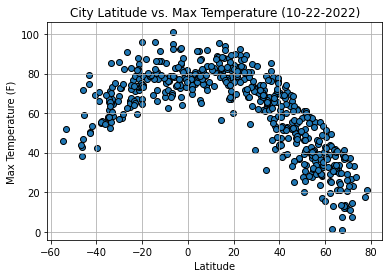

In [291]:
# Create a scatter plot for latitude vs Temperature
plt.scatter(city_data["Lat"],city_data["Max Temp"],marker='o',edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("Output_data/City_Lat_Max_Temp.png")

# Show Plot
plt.show()



* As the latitude increases the max temperature decreases.Latitude is inversely proportional to temperature.

# Latitude vs. Humidity Plot

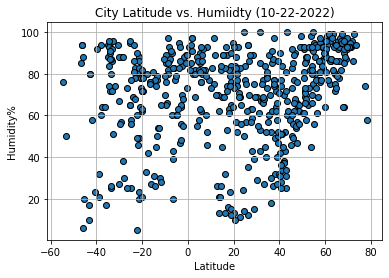

In [292]:
# Create a scatter plot for latitude vs Humidity
plt.scatter(city_data["Lat"],city_data["Humidity"],marker='o',edgecolors="black")
plt.title(f"City Latitude vs. Humiidty ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity%")

# Save the figure
plt.savefig("Output_data/City_Lat_Humidity.png")

# Show Plot
plt.show()


* There seems to be no direct relationship between latitude and humidity. Humidity% of most of the cities are found to be above 60%.There are only very limited number of cities located in area with humidity below 20%.

# Latitude vs. Cloudiness Plot

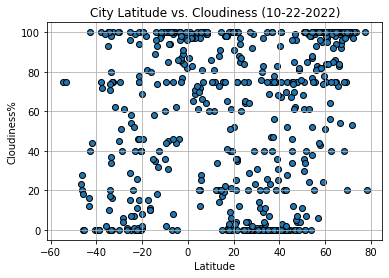

In [293]:
# Create a scatter plot for latitude vs Cloudiness
plt.scatter(city_data["Lat"],city_data["Cloudiness"],marker='o',edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness%")

# Save the figure
plt.savefig("Output_data/City_Lat_Cloudiness.png")

# Show Plot
plt.show()


* There is no Correlation seen between the latitude and cloudiness from the above plot.The data points are more concentrated at 100%, 0%, also evenly across all latitudes. 

# Latitude vs. Wind Speed Plot

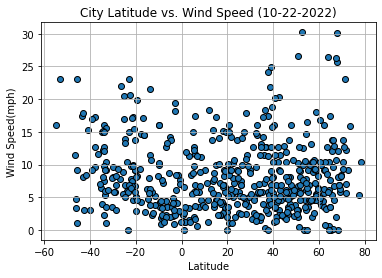

In [294]:
# Create a scatter plot for latitude vs Wind Speed
plt.scatter(city_data["Lat"],city_data["Wind Speed"],marker='o',edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

# Save the figure
plt.savefig("Output_data/City_Lat_WindSpeed.png")

# Show Plot
plt.show()


* Most cities have wind speed less than 15mph.There is no strong relationship between the wind speed and latitude from the above plot

# Linear Regression

In [295]:
# Find the latitude values >=0 for Northern Hemisphere using loc
north_data = city_data.loc[city_data["Lat"]>=0][["Lat","Max Temp","Humidity","Cloudiness","Wind Speed"]]
north_data.head()

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,69.4541,12.20,92,20,5.75
2,38.5167,69.78,64,20,21.85
3,5.6592,87.33,62,28,11.63
5,77.4840,17.65,74,100,5.35
8,42.0970,69.39,38,0,12.66


# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7513578529149185


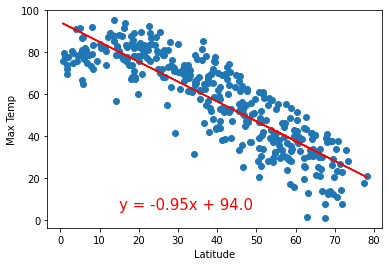

In [296]:
# Perform a linear regression on Maximum temperature vs. latitude
x_values = north_data["Lat"]
y_values = north_data["Max Temp"]
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(15,5),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Print r square value
# print(rvalue**2)
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [297]:
# Find the latitude <=0 for Southern Hemisphere using loc
south_data = city_data.loc[city_data["Lat"]<=0][["Lat","Max Temp","Humidity","Cloudiness","Wind Speed"]]
south_data.head()

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
1,-0.6000,81.97,73,82,7.70
4,-13.7000,66.02,77,18,11.50
6,-23.1203,71.20,83,99,23.11
7,-54.8000,46.06,76,75,16.11
15,-33.9258,71.38,72,0,16.11


The r-value is 0.4310417236065775


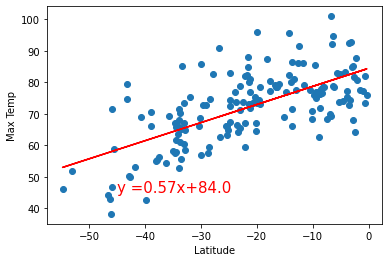

In [298]:
# Perform a linear regression on temperature vs. latitude
x_values = south_data["Lat"]
y_values = south_data["Max Temp"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y =" + str(round(slope,2))+"x+"+ str(round(intercept))

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(-45,45),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

* In the Northern Hemisphere,the rvalue is 0.7513578529149185. It shows that there is strong Corelation between the Latitude and the Max Temperature.The linear regression line shows that lower the latitude,higher the temperature.
* In the Southern Hemisphere,the rvalue is 0.4310417236065775.It shows the Correlation between the latitude and Max temperature is Moderate and it is positive Corelation,which means the higher the latitude (closer the equator line) the higher the temperature.

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.07688210528650424


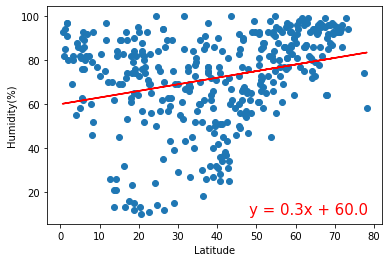

In [299]:
# Perform a linear regression on Humidity(%) vs. latitude
x_values = north_data["Lat"]
y_values = north_data["Humidity"]
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(48,10),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.010181474522934365


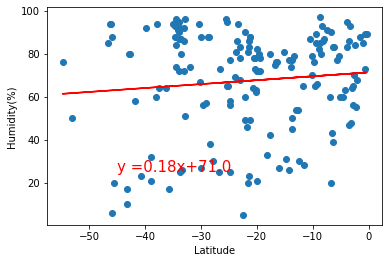

In [300]:
# Perform a linear regression on temperature vs. latitude
x_values = south_data["Lat"]
y_values = south_data["Humidity"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y =" + str(round(slope,2))+"x+"+ str(round(intercept))

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(-45,25),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Print r square value
print(f"The r-value is {rvalue**2}")
#show Plot
plt.show()

* As per the above figure,the correlation between latitude and percentage of humidity in both northeren hemisphere and southern hemisphere seems to be very weak as the rvalues are very low.

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.05111947108903826


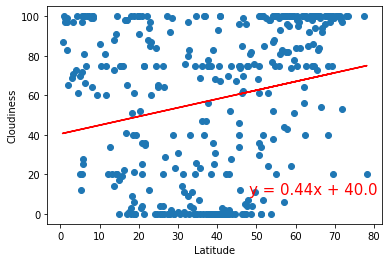

In [301]:
# Perform a linear regression on Humidity(%) vs. latitude
x_values = north_data["Lat"]
y_values = north_data["Cloudiness"]
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(48,10),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.11802341303806449


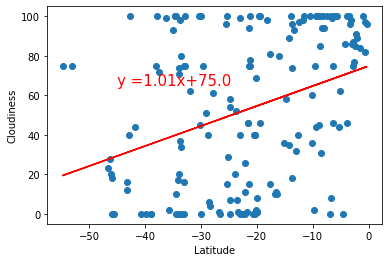

In [302]:
# Perform a linear regression on temperature vs. latitude
x_values = south_data["Lat"]
y_values = south_data["Cloudiness"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y =" + str(round(slope,2))+"x+"+ str(round(intercept))

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(-45,65),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

* The rvalues for northern and southern hemisphere seems to be low,which means the correlation between the latitude and the cloudiness is very weak. Linear regression lines and the low r-squared values in both graphs indicate that latitude might not be a significant factor that causes cloudiness.

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.016211859852492207


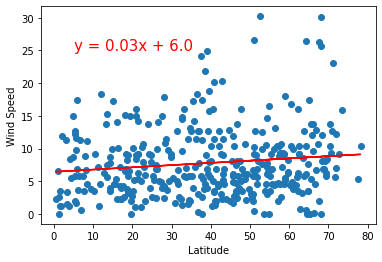

In [307]:
# Perform a linear regression on Humidity(%) vs. latitude
x_values = north_data["Lat"]
y_values = north_data["Wind Speed"]
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(5,25),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.08700605517950111


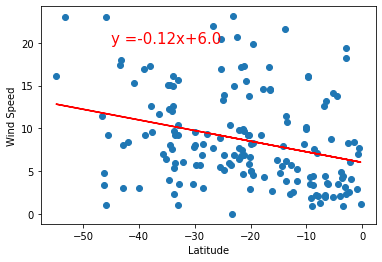

In [308]:
# Perform a linear regression on temperature vs. latitude
x_values = south_data["Lat"]
y_values = south_data["Wind Speed"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y =" + str(round(slope,2))+"x+"+ str(round(intercept))

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(-45,20),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

* The rvalues for northern and southern hemisphere seems to be very low,which means the correlation between the latitude and the wind speed is very weak.The regression lines and rvalues indicate that wind speed could not be predicted by the latitude.